# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: \ Manliguez, Sean Arthur
_Student No._:\ 2020-07582
_Section_: TX - 2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
#!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/AP157/Datasets/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [4]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [5]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [6]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
def get_features_targets(data):
  df1 = pd.DataFrame(data)
  #df1['u_concentration'] = df1['petroR50_u']/df1['petroR90_u']
  df1.insert(10, 'u_concentration',df1['petroR50_u']/df1['petroR90_u'])
  df1.insert(11, 'r_concentration',df1['petroR50_r']/df1['petroR90_r'])
  df1.insert(12, 'z_concentration',df1['petroR50_z']/df1['petroR90_z'])
  features = df1.iloc[:, 0:13]
  targets = df1.iloc[:,-1]
  return df1, features, targets

In [8]:
df1, features, targets = get_features_targets(data)
display(features)
# display(df1)
# print(features.shape)
# print(targets.shape)

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,u_concentration,r_concentration,z_concentration
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,0.353735,0.322113,0.339692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,0.428644,0.472435,0.437152
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,0.519802,0.415303,0.390645
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,0.484092,0.434376,0.465523
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,0.334817,0.546294,0.479873


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [9]:
def predict_class(data):
  X = features
  Y = targets
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
  clf = tree.DecisionTreeClassifier(random_state = 0)
  clf = clf.fit(X_train, Y_train)
  predicted_value = clf.predict(X_test)
  #print(predicted_value)
  actual_class = Y_test.to_numpy()
  return predicted_value, actual_class, clf

In [10]:
predicted_class, actual_class, clf = predict_class(data)
predicted_class[1]
for i in np.arange(2):
  print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))


0, spiral, spiral
1, elliptical, elliptical


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

In [11]:
from sklearn import metrics

In [21]:
confusion_matrix = metrics.confusion_matrix(actual_class, predicted_class, labels = clf.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)

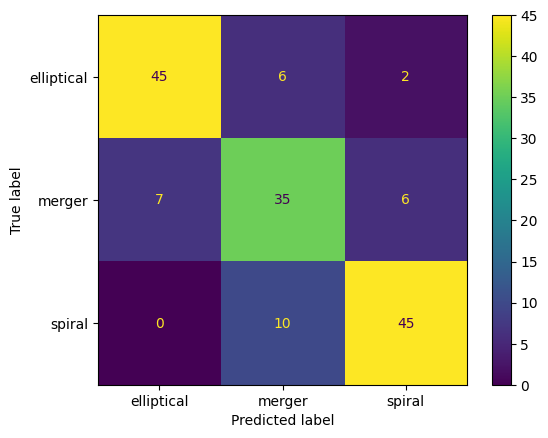

[[45  6  2]
 [ 7 35  6]
 [ 0 10 45]]


In [23]:
cm_display.plot()
plt.show()
print(confusion_matrix)

In [26]:
matches = predicted_class == actual_class
accuracy = matches.sum()/predicted_class.shape
print(accuracy)

[0.80128205]


# TRIALS

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)